# PROBLEM STATEMENT

**To Predict the Age of Abalone**

# DESCRIPTION

**Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.**

# IMPORT NECESSARY LIBRARIES

In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

# LOAD AND PREVIEW THE DATASET 

In [17]:
df=pd.read_csv(r'C:\Users\SYS\Desktop\cdk\datasets\Abalone.csv')

In [18]:
df

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,al
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,1.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,4.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,4.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,2.0
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,NaN
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,NaN
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,NaN
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,NaN


In [9]:
df.head()

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,al
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,4.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,4.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,2.0


**To get the target variable or the independent variable "AGE"**

**Age=1.5+Rings**

In [11]:
df['age'] = df['Rings']+1.5

In [12]:
#let's drop the column "Rings" 
df.drop('Rings', axis = 1, inplace = True)

# UNIVARIATE ANALYSIS

In [14]:
df.shape

(4177, 10)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   al              354 non-null    float64
 9   age             4177 non-null   float64
dtypes: float64(9), object(1)
memory usage: 326.5+ KB


In [16]:
df.columns

Index(['Gender', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight', 'al', 'age'],
      dtype='object')

In [33]:
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[np.object]).columns

C:\Users\SYS\AppData\Local\Temp\ipykernel_8772\914601936.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include=[np.object]).columns


In [34]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'al', 'age'],
      dtype='object')

In [35]:
categorical_features

Index(['Gender'], dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='count'>

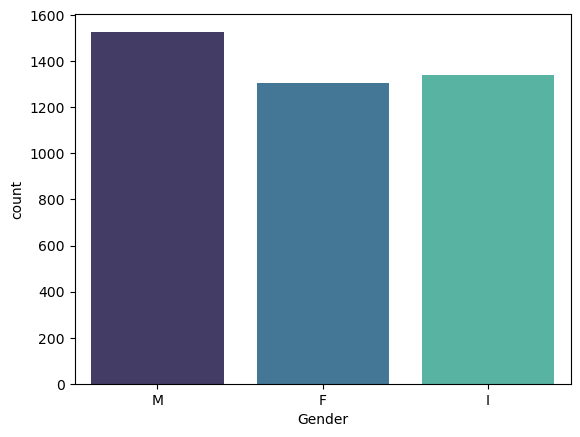

In [37]:
sns.countplot(x = 'Gender', data = df, palette="mako")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Gender', ylabel='age'>

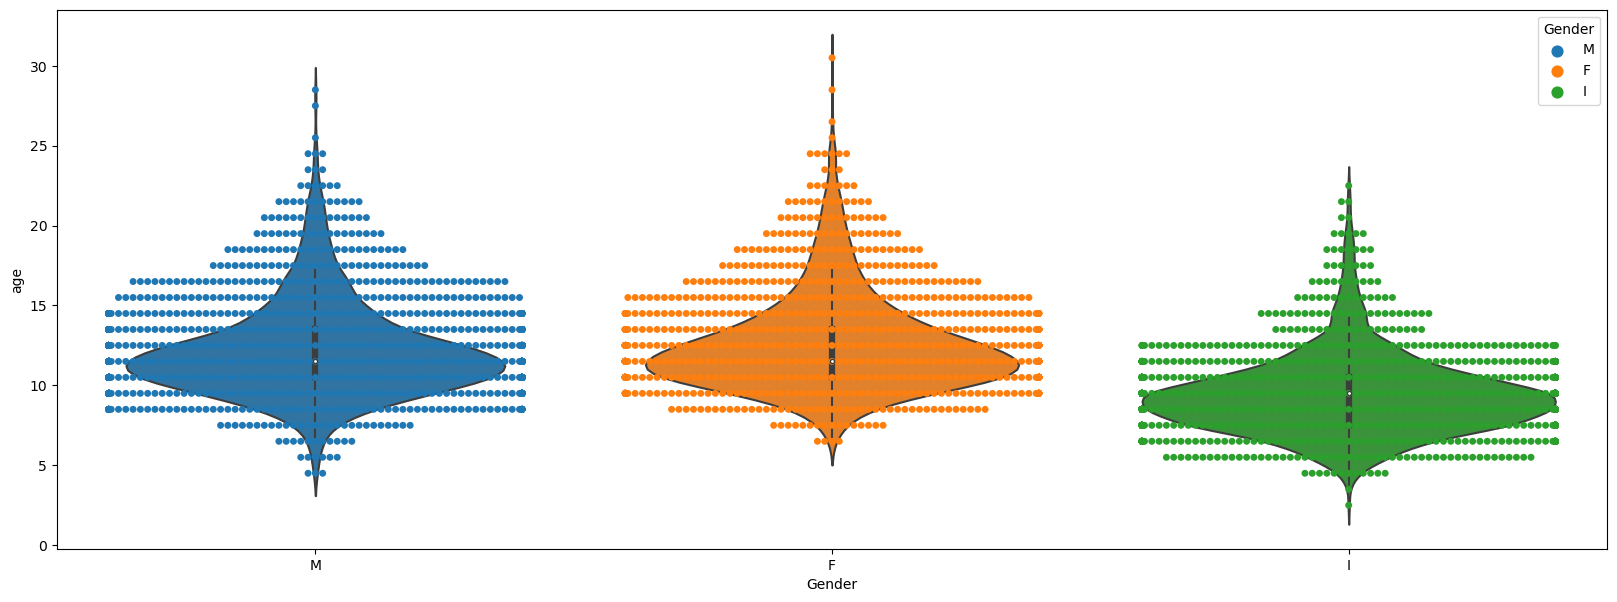

In [45]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Gender', y = 'age', data = df, hue = 'Gender')
sns.violinplot(x = 'Gender', y = 'age', data = df)

In [21]:
df.groupby('Gender')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'al']].mean().sort_values('al')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,al
Gender,,,,,,,,
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,0.928105
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,1.059701
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,1.134328


([<matplotlib.patches.Wedge at 0x212371a5430>,
 [Text(0.45010440780275796, 1.0036961801643607, ''),
  Text(-1.0848393519507589, -0.18199884741134378, ''),
  Text(0.6099659291018239, -0.9153914820091724, '')],
 [Text(0.24551149516514065, 0.5474706437260148, '36.6%'),
  Text(-0.5917305556095048, -0.09927209858800569, '32.1%'),
  Text(0.3327086886009948, -0.49930444473227575, '31.3%')])

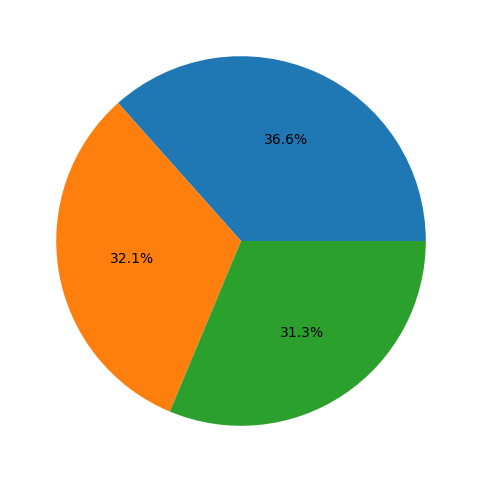

In [24]:
plt.subplots(figsize=(6,6))
plt.pie(df['Gender'].value_counts(),autopct="%1.1f%%")

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>],
       [<AxesSubplot:title={'center':'al'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

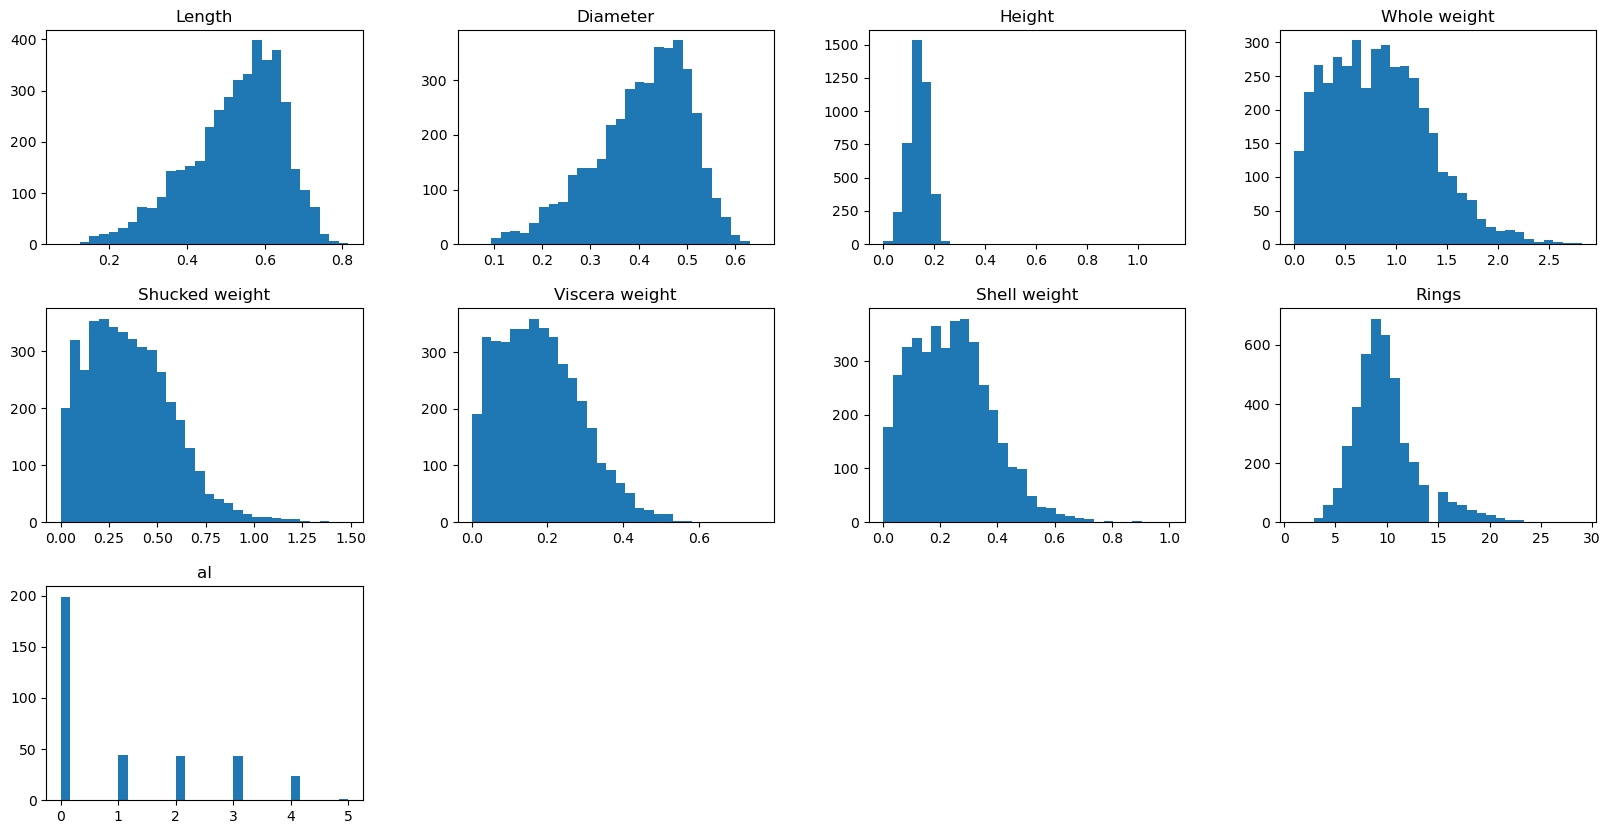

In [27]:
df.hist(figsize=(20,10), grid=False, layout=(3,4), bins = 30)

# BIVARIATE ANALYSIS

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rings', ylabel='Density'>

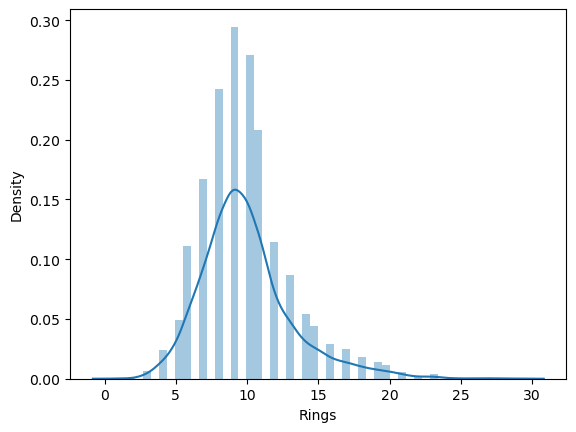

In [29]:
sns.distplot(df["Rings"])

# MULTIVARIATE ANALYSIS

In [44]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

# Find the outliers and replace them outliers

In [45]:
for i in df:
    if df[i].dtype=='int64' or df[i].dtypes=='float64':
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        df[i]=np.where(df[i] >upper, upper, df[i])
        df[i]=np.where(df[i] <lower, lower, df[i])

# After removing outliers, boxplot will be like

In [39]:
import matplotlib.pyplot as mtp

In [41]:
def box_scatter(data, x, y):    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
    sns.boxplot(data=data, x=x, ax=ax1)
    sns.scatterplot(data=data, x=x,y=y,ax=ax2)

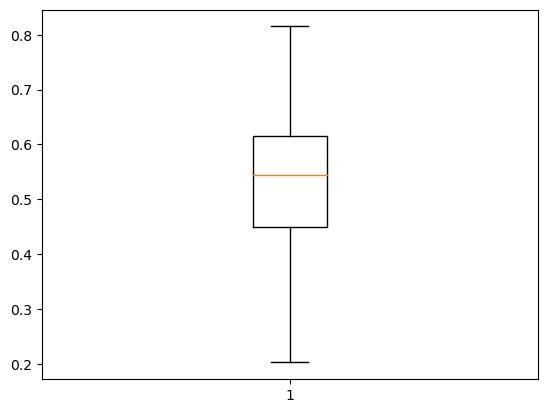

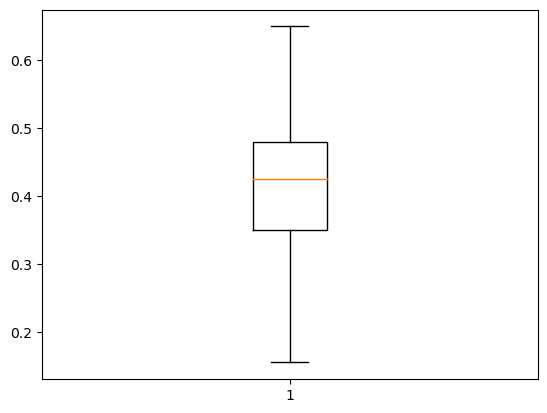

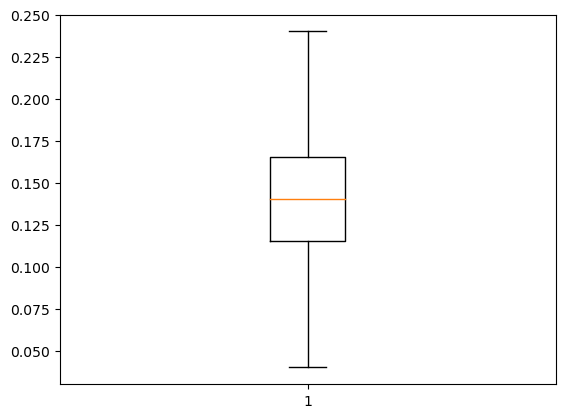

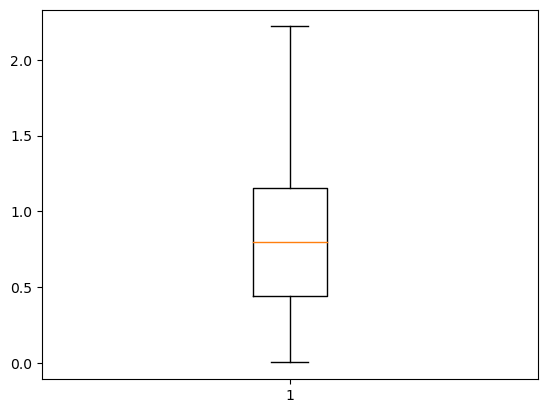

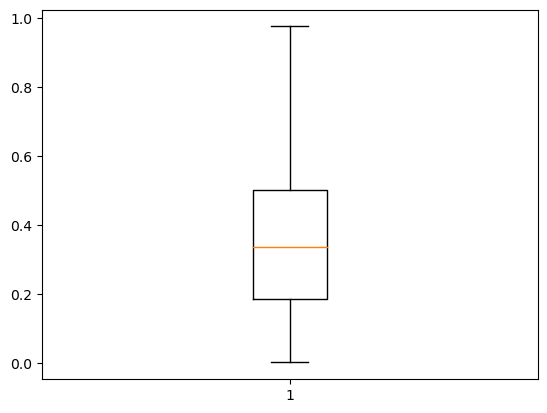

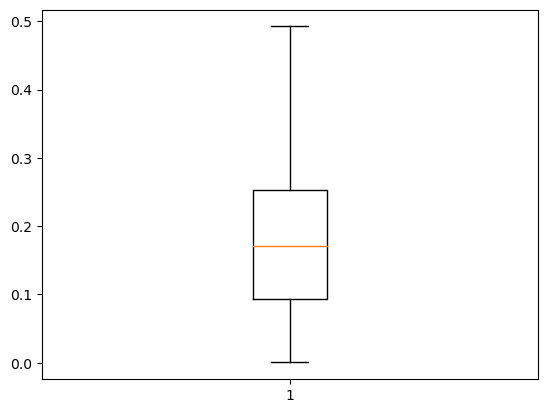

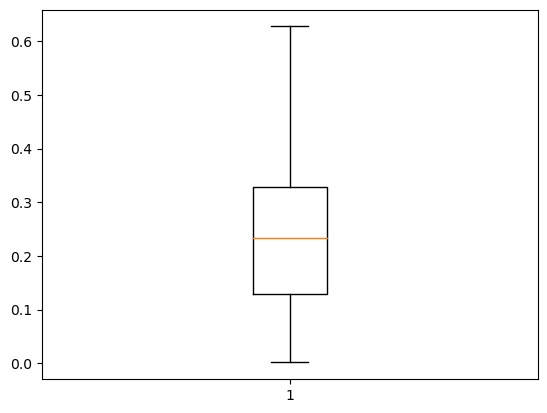

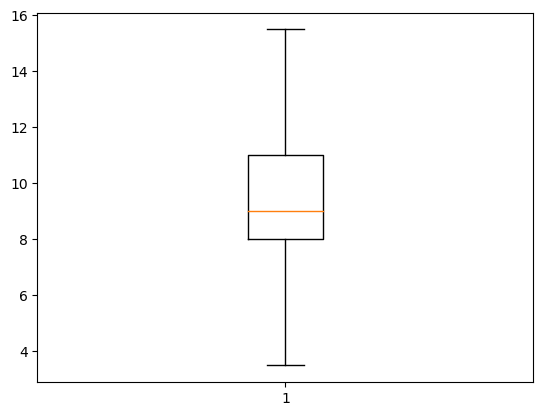

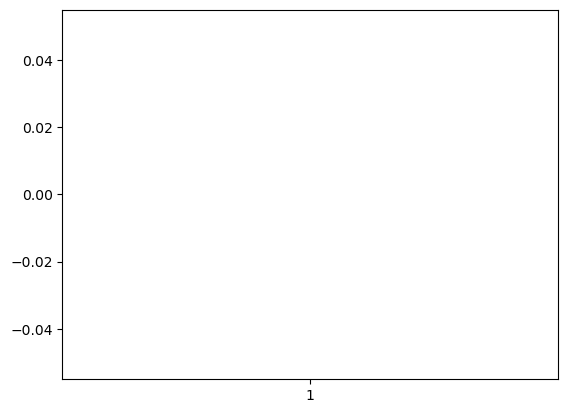

In [47]:
for i in df:
    if df[i].dtype=='int64' or df[i].dtypes=='float64':
        mtp.boxplot(df[i])
        mtp.show()

# Skewness of the Variables

In [48]:
df.skew().sort_values(ascending = False)

C:\Users\SYS\AppData\Local\Temp\ipykernel_7440\1630139964.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew().sort_values(ascending = False)


al                0.998157
Shucked weight    0.546594
Viscera weight    0.517749
Whole weight      0.468875
Shell weight      0.458793
Rings             0.353772
Height           -0.217345
Diameter         -0.548711
Length           -0.585183
dtype: float64

# Coorelation Plot

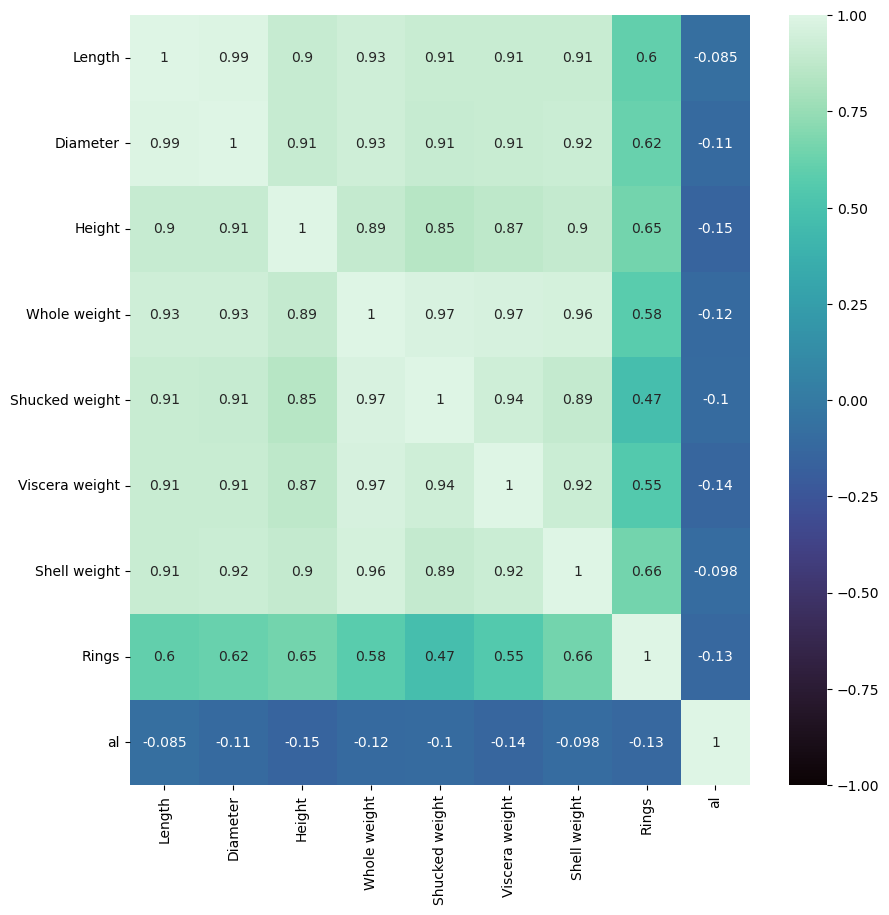

In [49]:
corr = df.corr()
plt.figure(figsize = (10,10))
ax = sns.heatmap(corr, vmin = -1, center = 0, annot = True, cmap = 'mako')

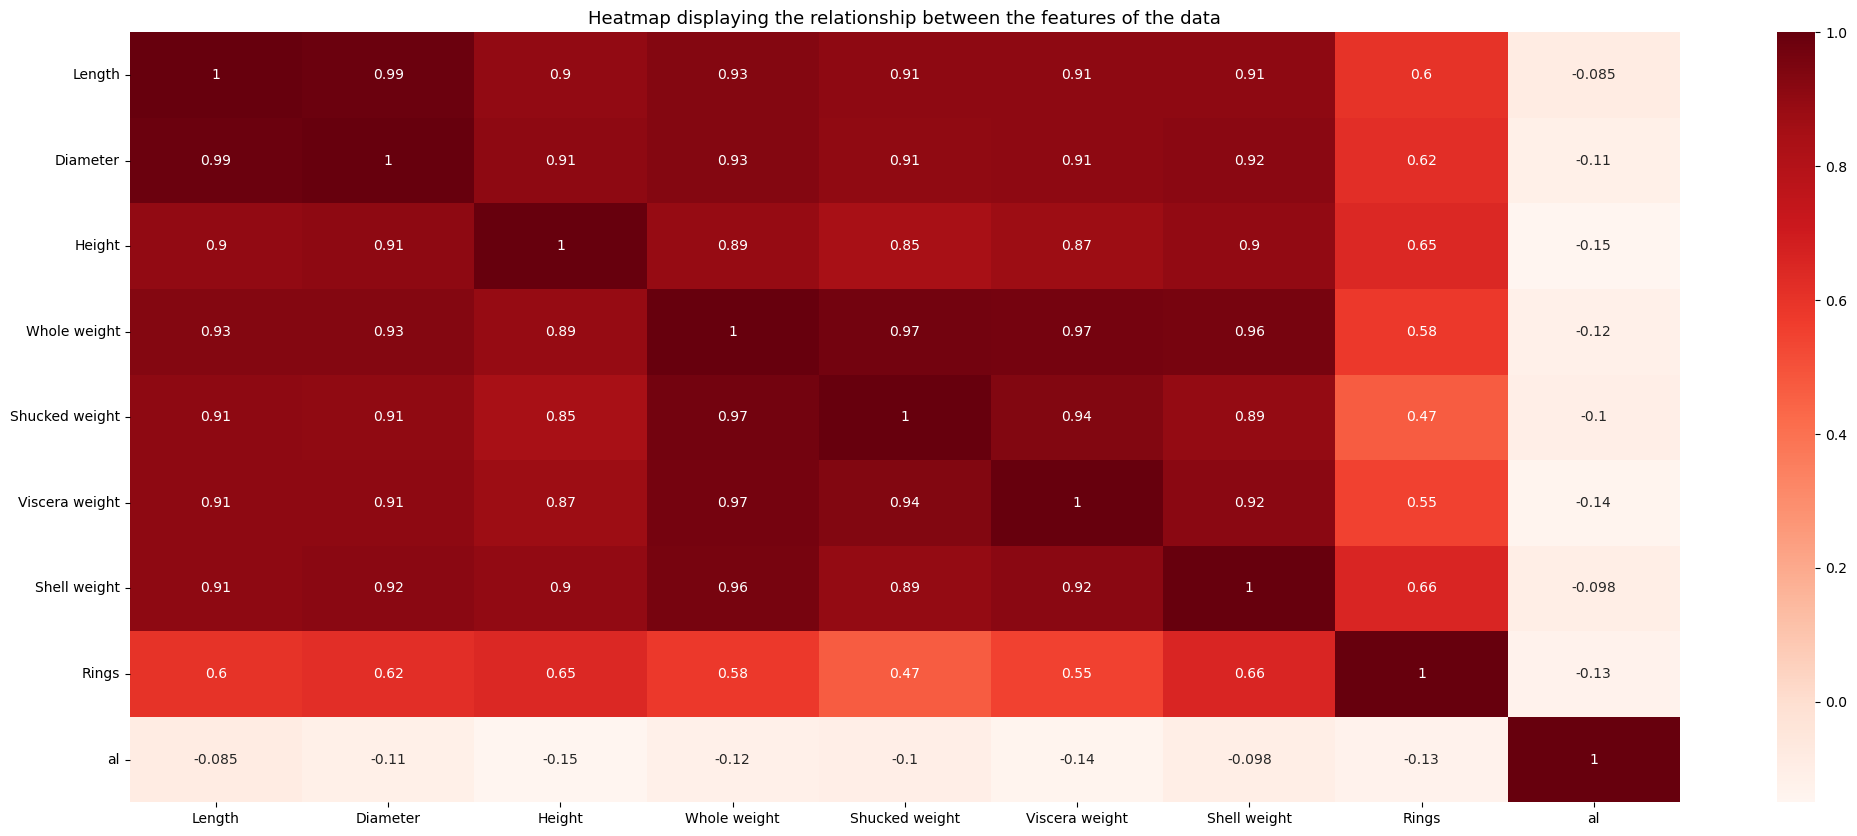

In [52]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data',
         fontsize=13)
plt.show()

# DESCRIPTIVE ANALYSIS

In [54]:
df.mean()

C:\Users\SYS\AppData\Local\Temp\ipykernel_7440\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Length            0.524373
Diameter          0.408271
Height            0.139318
Whole weight      0.827425
Shucked weight    0.357809
Viscera weight    0.180285
Shell weight      0.238049
Rings             9.766100
al                1.016949
dtype: float64

In [55]:
df.std()

C:\Users\SYS\AppData\Local\Temp\ipykernel_7440\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Length            0.118984
Diameter          0.098159
Height            0.038272
Whole weight      0.486184
Shucked weight    0.216794
Viscera weight    0.108577
Shell weight      0.136487
Rings             2.764243
al                1.352679
dtype: float64

In [56]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,al
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,354.000000
mean,0.524373,0.408271,0.139318,0.827425,0.357809,0.180285,0.238049,9.766100,1.016949
std,0.118984,0.098159,0.038272,0.486184,0.216794,0.108577,0.136487,2.764243,1.352679
min,0.202500,0.155000,0.040000,0.002000,0.001000,0.000500,0.001500,3.500000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,2.000000
max,0.815000,0.650000,0.240000,2.220250,0.976000,0.492250,0.627500,15.500000,5.000000


# CHECKING AND DEALING WITH MISSING VALUES

In [57]:
df.isnull().sum()

Gender               0
Length               0
Diameter             0
Height               0
Whole weight         0
Shucked weight       0
Viscera weight       0
Shell weight         0
Rings                0
al                3823
dtype: int64

# CHECKING AND REPLACING THE OUTLIERS

In [58]:
data = pd.get_dummies(df)
dummy_data = data.copy()

<AxesSubplot:>

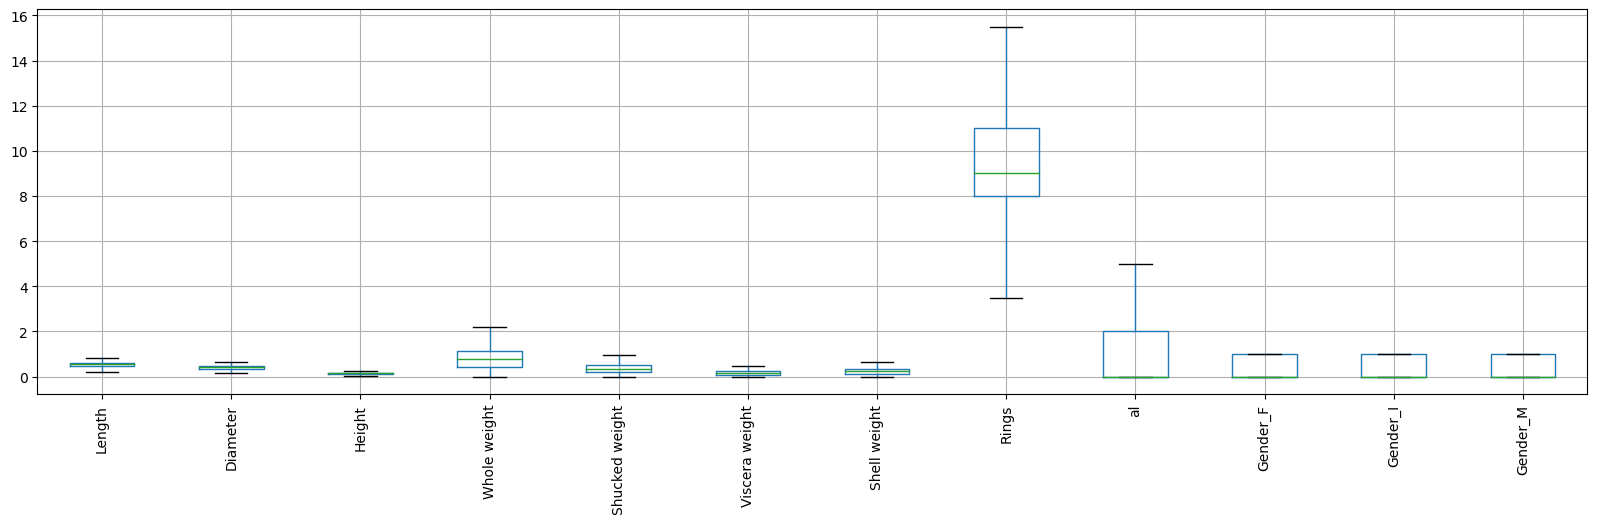

In [59]:
data.boxplot( rot = 90, figsize=(20,5))

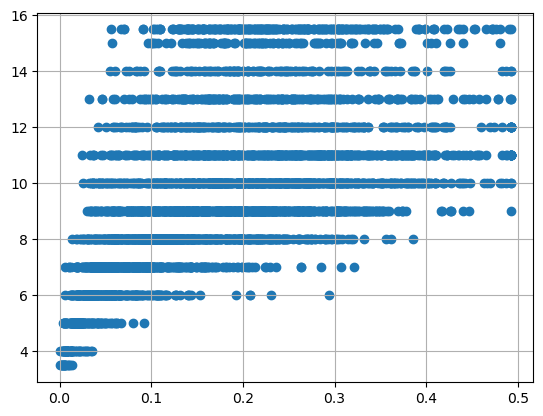

In [63]:
var = 'Viscera weight'
plt.scatter(x = data[var], y = data['Rings'],)
plt.grid(True)

In [65]:
data.drop(data[(data['Viscera weight']> 0.5) & (data['al'] < 20)].index, inplace=True)
data.drop(data[(data['Viscera weight']<0.5) & (data['al'] > 25)].index, inplace=True)

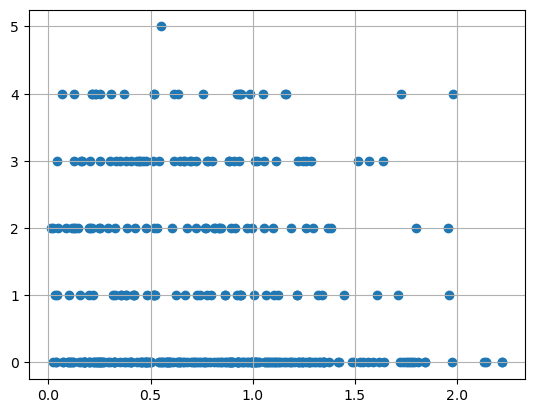

In [66]:
var = 'Whole weight'
plt.scatter(x = data[var], y = data['al'],)
plt.grid(True)

In [69]:
data.drop(data[(data['Whole weight']>= 2.5) & (data['Shucked weight'] < 25)].index, inplace=True)
data.drop(data[(data['Whole weight']<2.5) & (data['Shucked weight'] > 25)].index, inplace=True)

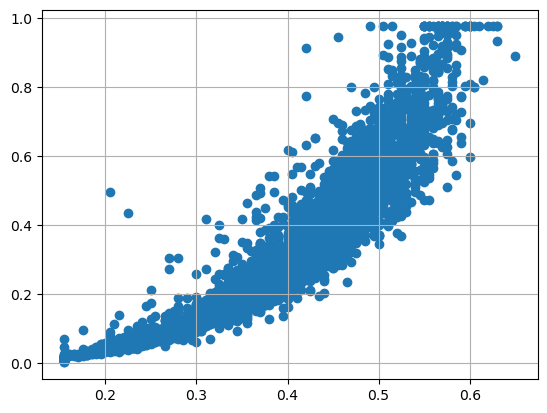

In [71]:
var = 'Diameter'
plt.scatter(x = data[var], y = data['Shucked weight'],)
plt.grid(True)

# CHECKING AND ENCODING THE CATEGORICAL VARIABLES

In [73]:
df.dtypes

Gender             object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings             float64
al                float64
dtype: object

In [76]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Gender'.
df['Gender']= label_encoder.fit_transform(df['Gender'])
  
df['Gender'].unique()

array([2, 0, 1], dtype=int64)

# SPLITTING THE DATA

In [79]:
X= df.drop(['Rings'], axis = 1)
y = df['Rings']

# SPLIT THE DATA INTO TRAINING AND TESTING

In [113]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print(X_train, X_test, y_train, y_test)

      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
1794   0.575     0.450   0.130        0.8145          0.4030          0.1715   
1466   0.515     0.425   0.145        0.9365          0.4970          0.1810   
2275   0.655     0.525   0.185        1.2590          0.4870          0.2215   
3929   0.650     0.515   0.215        1.4980          0.5640          0.3230   
1955   0.645     0.510   0.180        1.6195          0.7815          0.3220   
...      ...       ...     ...           ...             ...             ...   
2103   0.375     0.290   0.100        0.2760          0.1175          0.0565   
3603   0.420     0.325   0.110        0.3250          0.1245          0.0755   
3340   0.540     0.435   0.145        0.9700          0.4285          0.2200   
3064   0.635     0.500   0.180        1.1540          0.4405          0.2315   
3398   0.365     0.285   0.085        0.2205          0.0855          0.0515   

      Shell weight  Rings  al  Gender_F

# BUILD THE MODEL

In [87]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()

In [88]:
LinearRegression()

LinearRegression()

# TRAIN THE MODEL

In [111]:
RandomForestRegressor()

RandomForestRegressor()

# Scale the independent variables

In [112]:
df_scaled =data.copy()
col_names = ['Shucked weight', 'Whole weight']
features = df_scaled[col_names]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled[col_names] = scaler.fit_transform(features.values)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 10))

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,al,Gender_F,Gender_I,Gender_M
0,0.455,0.365,0.095,6.154063,6.146154,0.1010,0.1500,15.0,1.0,0,0,1
1,0.350,0.265,0.090,5.503775,5.505128,0.0485,0.0700,7.0,4.0,0,0,1
2,0.530,0.420,0.135,6.521470,6.310256,0.1415,0.2100,9.0,2.0,1,0,0
3,0.440,0.365,0.125,6.158571,6.100000,0.1140,0.1550,10.0,4.0,0,0,1
4,0.330,0.255,0.080,5.457568,5.453846,0.0395,0.0550,7.0,2.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,6.994816,6.892308,0.2390,0.2490,11.0,NaN,1,0,0
4173,0.590,0.440,0.135,7.172884,7.246154,0.2145,0.2605,10.0,NaN,0,0,1
4174,0.600,0.475,0.205,7.646230,7.689744,0.2875,0.3080,9.0,NaN,0,0,1
4175,0.625,0.485,0.150,7.462527,7.717949,0.2610,0.2960,10.0,NaN,1,0,0


# Split the data into dependent and independent variables

In [114]:
X= data.iloc[ : , :-1].values

y= data.iloc[ : , 4].values
print(X,y)

[[0.455 0.365 0.095 ... 1.    0.    0.   ]
 [0.35  0.265 0.09  ... 4.    0.    0.   ]
 [0.53  0.42  0.135 ... 2.    1.    0.   ]
 ...
 [0.6   0.475 0.205 ...   nan 0.    0.   ]
 [0.625 0.485 0.15  ...   nan 1.    0.   ]
 [0.71  0.555 0.195 ...   nan 0.    0.   ]] [0.2245 0.0995 0.2565 ... 0.5255 0.531  0.9455]


Value

In [116]:
X_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,al,Gender_F,Gender_I
1794,0.575,0.450,0.130,0.8145,0.4030,0.1715,0.2130,10.0,NaN,0,1
1466,0.515,0.425,0.145,0.9365,0.4970,0.1810,0.2185,8.0,NaN,0,0
2275,0.655,0.525,0.185,1.2590,0.4870,0.2215,0.4450,15.5,NaN,0,0
3929,0.650,0.515,0.215,1.4980,0.5640,0.3230,0.4250,15.5,NaN,1,0
1955,0.645,0.510,0.180,1.6195,0.7815,0.3220,0.4675,12.0,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2103,0.375,0.290,0.100,0.2760,0.1175,0.0565,0.0850,9.0,NaN,0,0
3603,0.420,0.325,0.110,0.3250,0.1245,0.0755,0.1025,7.0,NaN,0,1
3340,0.540,0.435,0.145,0.9700,0.4285,0.2200,0.2640,15.5,NaN,0,1
3064,0.635,0.500,0.180,1.1540,0.4405,0.2315,0.3870,9.0,NaN,0,0


In [118]:
y_train

1794    0
1466    1
2275    1
3929    0
1955    0
       ..
2103    1
3603    0
3340    0
3064    1
3398    1
Name: Gender_M, Length: 3341, dtype: uint8

In [120]:
X_test

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,al,Gender_F,Gender_I
341,0.620,0.510,0.205,1.3475,0.4775,0.2565,0.480,14.0,0.0,1,0
3413,0.490,0.395,0.120,0.6740,0.3325,0.1235,0.185,9.0,NaN,0,0
1088,0.450,0.340,0.120,0.4925,0.2410,0.1075,0.120,6.0,NaN,0,1
98,0.470,0.370,0.130,0.5225,0.2010,0.1330,0.165,7.0,NaN,0,0
3661,0.550,0.415,0.150,0.7915,0.3535,0.1760,0.236,10.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1662,0.605,0.455,0.145,0.9775,0.4680,0.1775,0.275,9.0,NaN,1,0
2656,0.545,0.420,0.120,0.7865,0.4030,0.1850,0.170,7.0,NaN,0,0
2185,0.445,0.340,0.120,0.4475,0.1930,0.1035,0.130,9.0,NaN,0,0
727,0.480,0.375,0.105,0.5250,0.2185,0.1195,0.155,12.0,NaN,1,0


In [122]:
y_test

341     0
3413    1
1088    0
98      1
3661    0
       ..
1662    0
2656    1
2185    1
727     0
3796    0
Name: Gender_M, Length: 836, dtype: uint8

# INFERENCE

RANDOM FOREST MODEL IS THE BEST MODEL OR GENERALISED WHEN COMPARED WITH OTHER MODELs.

**PREDICTION OF THE AGE OF ABALONE IS DONE SUCCESSFULLY!**